# AAPL price forecasting

## Importing and setting up data to be used in the model

In [1]:
## Importing the required libraries: quantmod, tidyverse and prophet
library(quantmod)
library(prophet)
library(tidyverse)

Warning message:
"package 'quantmod' was built under R version 4.1.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.1.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.1.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 4.1.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'prophet' was built under R version 4.1.3"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.1.3"
Loading required package: rlang

Warning message:
"package 'rlang' was built under R version 4.1.3"
Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages ---------------------------------------------------------------------

In [2]:
## Importing AAPL historical data into R
getSymbols("AAPL")

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "AAPL"

In [3]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.562706
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.619588
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.600933
2007-01-08  3.070000  3.090357 3.045714   3.052500   797106800      2.613777
2007-01-09  3.087500  3.320714 3.041071   3.306071  3349298400      2.830904
2007-01-10  3.383929  3.492857 3.337500   3.464286  2952880000      2.966379

In [4]:
## Converting the xts file into csv for easier manipulation
write.zoo(AAPL,file="AAPL.price.csv",sep=",")
AAPL_price <- read_csv("AAPL.price.csv")

Rows: 3854 Columns: 7
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (6): AAPL.Open, AAPL.High, AAPL.Low, AAPL.Close, AAPL.Volume, AAPL.Adju...
date (1): Index

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(AAPL_price)

Index,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007-01-03,3.081786,3.092143,2.925000,2.992857,1238319600,2.562706
2007-01-04,3.001786,3.069643,2.993571,3.059286,847260400,2.619588
2007-01-05,3.063214,3.078571,3.014286,3.037500,834741600,2.600933
2007-01-08,3.070000,3.090357,3.045714,3.052500,797106800,2.613777
2007-01-09,3.087500,3.320714,3.041071,3.306071,3349298400,2.830904
2007-01-10,3.383929,3.492857,3.337500,3.464286,2952880000,2.966379


In [6]:
## Only the date and closing price is required for analysis
AAPL_price <- cbind(AAPL_price[1],AAPL_price[5])

In [7]:
head(AAPL_price)

,Index,AAPL.Close
,<date>,<dbl>
1,2007-01-03,2.992857
2,2007-01-04,3.059286
3,2007-01-05,3.037500
4,2007-01-08,3.052500
5,2007-01-09,3.306071
6,2007-01-10,3.464286


In [8]:
## Changing column names to make it compatible to be used with the prophet library
colnames(AAPL_price) <- c("ds","y")

In [9]:
head(AAPL_price)

,ds,y
,<date>,<dbl>
1,2007-01-03,2.992857
2,2007-01-04,3.059286
3,2007-01-05,3.037500
4,2007-01-08,3.052500
5,2007-01-09,3.306071
6,2007-01-10,3.464286


# Creating the model

In [10]:
## We will AAPL price from 2008 to 2020 for our model
AAPL_2008_to_2020 <- subset(AAPL_price, ds > '2008-01-01' & ds < '2020-12-31')

In [11]:
model <- prophet(AAPL_2008_to_2020,daily.seasonality = TRUE)

In [12]:
future <- make_future_dataframe(model,periods=365)

In [13]:
forecast <- predict(model,future)

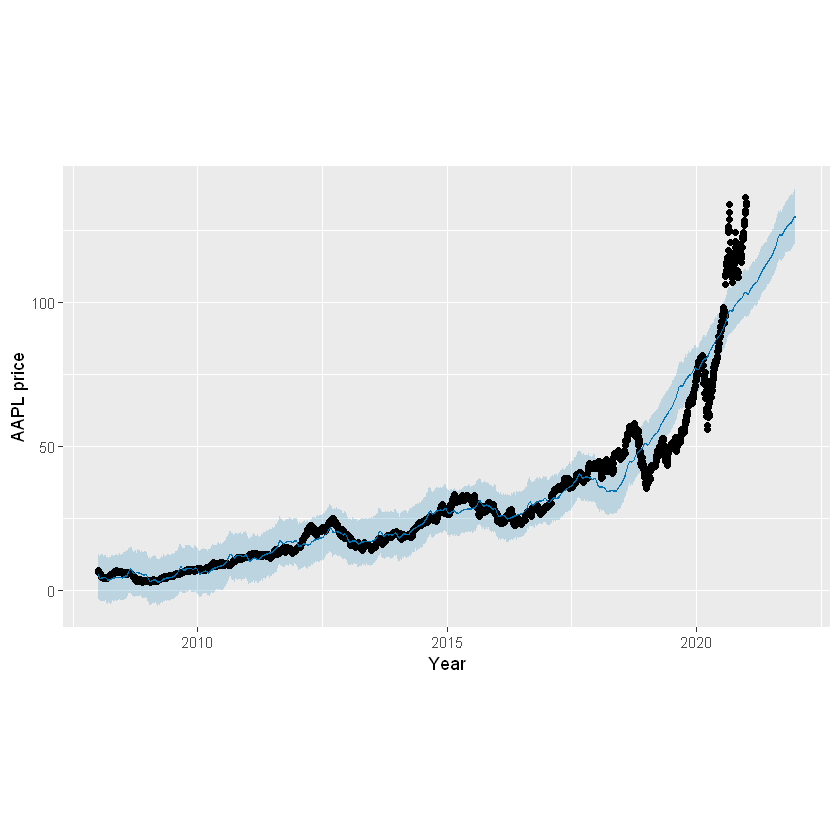

In [14]:
plot(model,forecast,ylab="AAPL price",xlab="Year")
## Black dots represent actual price
## Dark blue line represents the model price
## Light blue shaded area represents the upper and lower error bounds for the model

## Checking the accuracy of our model

In [15]:
## Obtaining the 2021 AAPL prices
AAPL_2021 <- subset(AAPL_price,ds > '2021-01-01' & ds < '2021-12-31')

In [16]:
## Obtaining the 2021 AAPL prices according to our model
forecast_2021 <- subset(forecast,forecast[1] > '2020-12-31')

In [17]:
## Our model creates AAPL price for 365 days, while the AAPL data for 2021 only has 251 observations corresponding to the days
##    when NASDAQ was operating, thus to check for accuracy we can't implement a one-to-one value comparison. Instead, we will
##    obtain the mean of the actual and forecasted price and compare them

In [18]:
actual_price_mean <- colMeans(AAPL_2021[2])
forecast_price_mean <- colMeans(forecast_2021["yhat"])

In [19]:
percentage_error <- (abs(actual_price_mean - forecast_price_mean)/actual_price_mean)*100

In [20]:
accuracy <- 100 - percentage_error

In [21]:
accuracy

y 
82.71472

In [22]:
## Our model has an 82.7 percent accuracy